In [2]:
# Report link
# https://docs.google.com/document/d/1rElNDpHfDFQjACL_KcCWW5UUFW2EArOx8pxwyxsec7c/edit?usp=sharing

import torch
import torchvision
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torchvision.datasets as dsets
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.nn import functional as F

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
n_epochs = 1
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [4]:
# Hyper Parameters 
input_size = 784
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.01

In [5]:
# MNIST Dataset (Images and Labels)
train_dataset = dsets.MNIST(root='files', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=False)

test_dataset = dsets.MNIST(root='files', 
                           train=False, 
                           transform=transforms.ToTensor(),
                           download=False)

# Dataset Loader (Input Pipline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [59]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [60]:
example_data.shape

torch.Size([100, 1, 28, 28])

In [208]:
class Net(nn.Module):

    def __init__(self, input_size, hidden_size, out_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        
        # Dropout module with 0.2 probbability
        self.dropout = nn.Dropout(p=0.2)
        # Add softmax on output layer
        self.log_softmax = F.log_softmax

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        
        x = self.log_softmax(self.fc5(x), dim=1)
        
        return x

In [227]:
input_size = 784
hidden_size = 500
output_size = 10
num_epochs = 25

learning_rate = 0.01

network = Net(input_size,hidden_size, output_size)

criterion = nn.NLLLoss()  

#Optimizer: Stochastic Gradient Descent
optimizer = torch.optim.SGD(network.parameters(), lr=learning_rate)  

In [228]:
#Plotting loss 
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [229]:
training_losses = []
train_counter = []
c=0

# Training the Model: If you Rerun this cell, model start training from where you left it (Weights)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Forward + Backward + Optimize
        #Reset the Gradients before Training 
        optimizer.zero_grad()
        outputs = network(images)
        #Find loss using predicted output and true labels
        loss = criterion(outputs, labels)
        #BackProp the grads
        loss.backward()
        #Update the parameteres
        optimizer.step()
        
        training_losses.append(loss.item())
#         train_counter.append((i*64) + ((epoch-1)*len(train_loader.dataset)))
        c = c+1
        train_counter.append(c)
        if (i+1) % 100 == 0:
            print ('Epoch: [%d/%d], Step: [%d/%d], Loss: %.4f' 
                   % (epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))


Epoch: [1/25], Step: [100/600], Loss: 2.3141
Epoch: [1/25], Step: [200/600], Loss: 2.3177
Epoch: [1/25], Step: [300/600], Loss: 2.2972
Epoch: [1/25], Step: [400/600], Loss: 2.3009
Epoch: [1/25], Step: [500/600], Loss: 2.3061
Epoch: [1/25], Step: [600/600], Loss: 2.2958
Epoch: [2/25], Step: [100/600], Loss: 2.2953
Epoch: [2/25], Step: [200/600], Loss: 2.2909
Epoch: [2/25], Step: [300/600], Loss: 2.2827
Epoch: [2/25], Step: [400/600], Loss: 2.2828
Epoch: [2/25], Step: [500/600], Loss: 2.2761
Epoch: [2/25], Step: [600/600], Loss: 2.2544
Epoch: [3/25], Step: [100/600], Loss: 2.2483
Epoch: [3/25], Step: [200/600], Loss: 2.2390
Epoch: [3/25], Step: [300/600], Loss: 2.2227
Epoch: [3/25], Step: [400/600], Loss: 2.1707
Epoch: [3/25], Step: [500/600], Loss: 2.0646
Epoch: [3/25], Step: [600/600], Loss: 1.9879
Epoch: [4/25], Step: [100/600], Loss: 1.7877
Epoch: [4/25], Step: [200/600], Loss: 1.7258
Epoch: [4/25], Step: [300/600], Loss: 1.4808
Epoch: [4/25], Step: [400/600], Loss: 1.4838
Epoch: [4/

In [230]:
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    outputs = network(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the model on the 10000 test images: 95 %


In [231]:
#training_losses

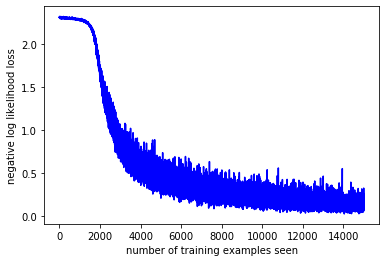

In [232]:
fig = plt.figure()
plt.plot(train_counter, training_losses, color='blue')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.savefig('4.png')

In [233]:
print(network)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)
